In [1]:
#import packages:
import pandas as pd
import sqlite3

#Making a Connection to the sqlite database:
conn = sqlite3.connect('Downloads/lahman2016.sqlite')

In [2]:
#Querying Database for all seasons where a team played 150 or more games and is still active today.
query = '''select * from Teams 
inner join TeamsFranchises
on Teams.franchID == TeamsFranchises.franchID
where Teams.G >= 150 and TeamsFranchises.active == 'Y';
'''

In [3]:
#fetch the data from the database:
Teams = conn.execute(query).fetchall()

In [4]:
#create a dataframe from the Teams resultset:
Teams_df=pd.DataFrame(Teams)

#check the head of dataframe:
Teams_df.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1961,AL,LAA,ANA,None,8,162,82.0,70,91,...,603510,111,112,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
1,1962,AL,LAA,ANA,None,3,162,81.0,86,76,...,1144063,97,97,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
2,1963,AL,LAA,ANA,None,9,161,81.0,70,91,...,821015,94,94,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
3,1964,AL,LAA,ANA,None,5,162,81.0,82,80,...,760439,90,90,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
4,1965,AL,CAL,ANA,None,7,162,80.0,75,87,...,566727,97,98,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None


In [5]:
#rename the col names, to the dataframe:
cols = ['yearID','lgID','teamID','franchID','divID','Rank','G','Ghome',
        'W','L','DivWin','WCWin','LgWin','WSWin','R','AB','H','2B','3B',
        'HR','BB','SO','SB','CS','HBP','SF','RA','ER','ERA','CG','SHO','SV',
        'IPouts','HA','HRA','BBA','SOA','E','DP','FP','name','park','attendance',
        'BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro','franchID','franchName','active','NAassoc']

In [6]:
#assign the cols to the dataframe:
Teams_df.columns = cols

#check the head of dataframe:
Teams_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,franchID,franchName,active,NAassoc
0,1961,AL,LAA,ANA,None,8,162,82.0,70,91,...,603510,111,112,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
1,1962,AL,LAA,ANA,None,3,162,81.0,86,76,...,1144063,97,97,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
2,1963,AL,LAA,ANA,None,9,161,81.0,70,91,...,821015,94,94,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
3,1964,AL,LAA,ANA,None,5,162,81.0,82,80,...,760439,90,90,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
4,1965,AL,CAL,ANA,None,7,162,80.0,75,87,...,566727,97,98,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None


In [7]:
#check the length of dataframe (number of data points):
print(len(Teams_df))

2287


In [8]:
#Dropping unncessary columns variables
drop_cols = ['lgID','franchID','divID','Rank','Ghome','L','DivWin','WCWin','LgWin',
             'WSWin','SF','name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45',
             'teamIDretro','franchID','franchName','active','NAassoc']

#drop cols in the dataframe:
Teams_df = Teams_df.drop(drop_cols,axis=1)

#check the head of dataframe:
Teams_df.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,...,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP
0,1961,LAA,162,70,744,5424,1331,218,22,189,...,5,34,4314,1391,180,713,973,192,154.0,0.969
1,1962,LAA,162,86,718,5499,1377,232,35,137,...,15,47,4398,1412,118,616,858,175,153.0,0.972
2,1963,LAA,161,70,597,5506,1378,208,38,95,...,13,31,4365,1317,120,578,889,163,155.0,0.974
3,1964,LAA,162,82,544,5362,1297,186,27,102,...,28,41,4350,1273,100,530,965,138,168.0,0.978
4,1965,CAL,162,75,527,5354,1279,200,36,92,...,14,33,4323,1259,91,563,847,123,149.0,0.981


In [9]:
#check the info of dataframe:
Teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 29 columns):
yearID    2287 non-null int64
teamID    2287 non-null object
G         2287 non-null int64
W         2287 non-null int64
R         2287 non-null int64
AB        2287 non-null int64
H         2287 non-null int64
2B        2287 non-null int64
3B        2287 non-null int64
HR        2287 non-null int64
BB        2287 non-null int64
SO        2177 non-null float64
SB        2287 non-null int64
CS        1868 non-null float64
HBP       510 non-null float64
RA        2287 non-null int64
ER        2287 non-null int64
ERA       2287 non-null float64
CG        2287 non-null int64
SHO       2287 non-null int64
SV        2287 non-null int64
IPouts    2287 non-null int64
HA        2287 non-null int64
HRA       2287 non-null int64
BBA       2287 non-null int64
SOA       2287 non-null int64
E         2287 non-null int64
DP        2265 non-null float64
FP        2287 non-null float64
dtypes: flo

In [10]:
#Printing no of null values in each column
print(Teams_df.isnull().sum(axis = 0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 419, 1777, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 0]


In [11]:
#drop the cols with null values:
Teams_df = Teams_df.drop(['CS','HBP'], axis = 1)

In [12]:
#Filling null values of SO and DP with their medians
Teams_df['SO'] = Teams_df['SO'].fillna(Teams_df['SO'].median())
Teams_df['DP'] = Teams_df['DP'].fillna(Teams_df['DP'].median())

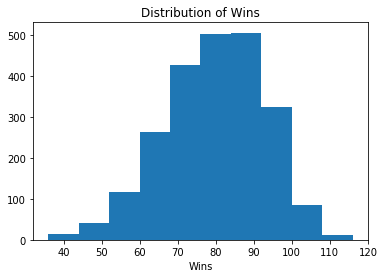

In [13]:
#import the packages:
import matplotlib.pyplot as plt
%matplotlib inline

#plot the distribution of wins:
plt.hist(Teams_df['W'])

#x lablel:
plt.xlabel('Wins')

#title:
plt.title('Distribution of Wins')

#show the plot:
plt.show()

In [14]:
Teams_df['W'].mean()

79.23043288150416

In [15]:
#Assigning Wins Bins
def assign_wins_bins(W):
    if W<50:
        return 1
    if W>=50 and W<=69:
        return 2
    if W>70 and W<89:
        return 3
    if W>90 and W<109:
        return 4
    if W>110:
        return 5
        
Teams_df['Wins_bins'] = Teams_df['W'].apply(assign_wins_bins)        

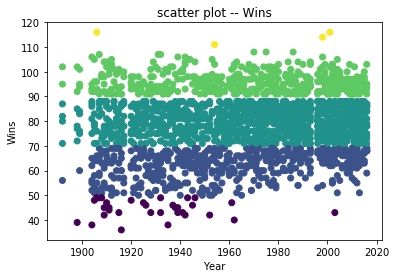

In [16]:
#plot the scatter plot graph on year vs wins:
plt.scatter(Teams_df['yearID'], Teams_df['W'], c=Teams_df['Wins_bins'])

#add the title:
plt.title('scatter plot -- Wins')

#add the x label:
plt.xlabel('Year')

#add the y label:
plt.ylabel('Wins')

#show the plot:
plt.show()

In [17]:
#Since there were very few seasons before 1900. We can remove them
Teams_df = Teams_df[Teams_df['yearID'] > 1900]

In [18]:
#Creating dictionary of runs per year and games per year
runs_per_year = {}
games_per_year = {}

for i, row in Teams_df.iterrows():
    year = row['yearID']
    runs = row['R']
    games = row['G']
    if year in runs_per_year:
        runs_per_year[year] = runs_per_year[year] + runs
        games_per_year[year] = games_per_year[year] + games
    else:    
        runs_per_year[year] = runs
        games_per_year[year] = games

print("Runs per year:-")

print(runs_per_year)

print("Games per Year:-")

print(games_per_year)

Runs per year:-
{1961: 12942, 1962: 14461, 1963: 12780, 1964: 13124, 1965: 12946, 1966: 12900, 1967: 12210, 1968: 11109, 1969: 15850, 1970: 16880, 1971: 15073, 1972: 13706, 1973: 16376, 1974: 16046, 1975: 16295, 1976: 15492, 1977: 18803, 1978: 17251, 1979: 18713, 1980: 18053, 1982: 18110, 1983: 18170, 1984: 17921, 1985: 18216, 1986: 18545, 1987: 19883, 1988: 17380, 1989: 17405, 1990: 17919, 1991: 18127, 1992: 17341, 1993: 20864, 1996: 22831, 1997: 21604, 1998: 23297, 1999: 24691, 2000: 24971, 2001: 23199, 2002: 22408, 2003: 22978, 2004: 23376, 2005: 22325, 2006: 23599, 2007: 23322, 2008: 22585, 2009: 22419, 2010: 21308, 2011: 20808, 2012: 21017, 2013: 20255, 2014: 19761, 2015: 20647, 2016: 21744, 1904: 9307, 1905: 9640, 1906: 8322, 1907: 8186, 1908: 8423, 1909: 8805, 1910: 9580, 1911: 11164, 1912: 11154, 1913: 9964, 1914: 9408, 1915: 9444, 1916: 8889, 1917: 8948, 1920: 10762, 1921: 11935, 1922: 12059, 1923: 11874, 1924: 11722, 1925: 12596, 1926: 11443, 1927: 11745, 1928: 11645, 1929: 1

In [19]:
#creating dictionary of mlb runs per game
mlb_runs_per_game = {}

for k, v in games_per_year.items():
    year = k
    games = v
    runs = runs_per_year[year]
    mlb_runs_per_game[year] = runs/games
    
mlb_runs_per_game
    

{1904: 3.7257806244995995,
 1905: 3.896523848019402,
 1906: 3.6072821846553964,
 1907: 3.5330168321104876,
 1908: 3.385450160771704,
 1909: 3.5475423045930703,
 1910: 3.8350680544435547,
 1911: 4.512530315278901,
 1912: 4.526785714285714,
 1913: 4.037277147487845,
 1914: 3.745222929936306,
 1915: 3.792771084337349,
 1916: 3.5641539695268647,
 1917: 3.587810745789896,
 1920: 4.360615883306321,
 1921: 4.855573637103336,
 1922: 4.870355411954765,
 1923: 4.815085158150851,
 1924: 4.761169780666125,
 1925: 5.128664495114006,
 1926: 4.636547811993517,
 1927: 4.75121359223301,
 1928: 4.729894394800975,
 1929: 5.185923515052888,
 1930: 5.5490275526742305,
 1931: 4.810679611650485,
 1932: 4.913219789132198,
 1933: 4.467216673903604,
 1934: 4.9303439268611235,
 1935: 4.86468952734013,
 1936: 5.188206785137318,
 1937: 4.870863599677159,
 1938: 4.902046147148455,
 1939: 4.823720552396425,
 1940: 4.679611650485437,
 1941: 4.488745980707395,
 1942: 4.111739130434783,
 1943: 3.9151857835218093,
 1944

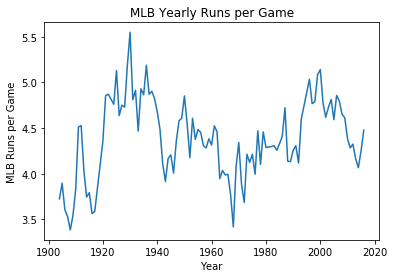

In [20]:
# Create lists from mlb_runs_per_game dictionary
lists = sorted(mlb_runs_per_game.items())
x, y = zip(*lists)

# Create line plot of Year vs. MLB runs per Game:
plt.plot(x, y)

#add a title:
plt.title('MLB Yearly Runs per Game')

#add a x-label:
plt.xlabel('Year')

#add a y-label:
plt.ylabel('MLB Runs per Game')

#show the plot:
plt.show()

In [21]:
def assign_label(year):
    if year < 1920:
        return 1
    elif year >= 1920 and year <= 1941:
        return 2
    elif year >= 1942 and year <= 1945:
        return 3
    elif year >= 1946 and year <= 1962:
        return 4
    elif year >= 1963 and year <= 1976:
        return 5
    elif year >= 1977 and year <= 1992:
        return 6
    elif year >= 1993 and year <= 2009:
        return 7
    elif year >= 2010:
        return 8
        
# Add `year_label` column to `df`    
Teams_df['year_label'] = Teams_df['yearID'].apply(assign_label)

dummy_df = pd.get_dummies(Teams_df['year_label'], prefix='era')

# Concatenate `df` and `dummy_df`
Teams_df = pd.concat([Teams_df, dummy_df], axis=1)
Teams_df.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,...,Wins_bins,year_label,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8
0,1961,LAA,162,70,744,5424,1331,218,22,189,...,NaN,4,0,0,0,1,0,0,0,0
1,1962,LAA,162,86,718,5499,1377,232,35,137,...,3.0,4,0,0,0,1,0,0,0,0
2,1963,LAA,161,70,597,5506,1378,208,38,95,...,NaN,5,0,0,0,0,1,0,0,0
3,1964,LAA,162,82,544,5362,1297,186,27,102,...,3.0,5,0,0,0,0,1,0,0,0
4,1965,CAL,162,75,527,5354,1279,200,36,92,...,3.0,5,0,0,0,0,1,0,0,0


In [22]:
#Create a column for mlb runs per game
def assign_mlb_rpg(year):
    return mlb_runs_per_game[year]


Teams_df['mlb_rpg']=Teams_df['yearID'].apply(assign_mlb_rpg)

In [23]:
#Converting years into decades

def assign_decade(year):
    if year < 1920:
        return 1910
    elif year >= 1920 and year <= 1929:
        return 1920
    elif year >= 1930 and year <= 1939:
        return 1930
    elif year >= 1940 and year <= 1949:
        return 1940
    elif year >= 1950 and year <= 1959:
        return 1950
    elif year >= 1960 and year <= 1969:
        return 1960
    elif year >= 1970 and year <= 1979:
        return 1970
    elif year >= 1980 and year <= 1989:
        return 1980
    elif year >= 1990 and year <= 1999:
        return 1990
    elif year >= 2000 and year <= 2009:
        return 2000
    elif year >= 2010:
        return 2010
    
Teams_df['Decade_label']=Teams_df['yearID'].apply(assign_decade)

decade_df=pd.get_dummies(Teams_df['Decade_label'],prefix='decade')

Teams_df=pd.concat([Teams_df,decade_df],axis=1)

Teams_df.drop(['yearID','year_label','Decade_label'],axis=1)

,teamID,G,W,R,AB,H,2B,3B,HR,BB,...,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010
0,LAA,162,70,744,5424,1331,218,22,189,681,...,0,0,0,0,1,0,0,0,0,0
1,LAA,162,86,718,5499,1377,232,35,137,602,...,0,0,0,0,1,0,0,0,0,0
2,LAA,161,70,597,5506,1378,208,38,95,448,...,0,0,0,0,1,0,0,0,0,0
3,LAA,162,82,544,5362,1297,186,27,102,472,...,0,0,0,0,1,0,0,0,0,0
4,CAL,162,75,527,5354,1279,200,36,92,443,...,0,0,0,0,1,0,0,0,0,0
5,CAL,162,80,604,5360,1244,179,54,122,525,...,0,0,0,0,1,0,0,0,0,0
6,CAL,161,84,567,5307,1265,170,37,114,453,...,0,0,0,0,1,0,0,0,0,0
7,CAL,162,67,498,5331,1209,170,33,83,447,...,0,0,0,0,1,0,0,0,0,0
8,CAL,163,71,528,5316,1221,151,29,88,516,...,0,0,0,0,1,0,0,0,0,0
9,CAL,162,86,631,5532,1391,197,40,114,447,...,0,0,0,0,0,1,0,0,0,0


In [24]:
#Creating two more new columns namely 'Runs scored per game' and 'Runs allowed per game'
Teams_df['runs_spg'] = Teams_df['R']/Teams_df['G']

Teams_df['runs_apg'] = Teams_df['RA']/Teams_df['G']

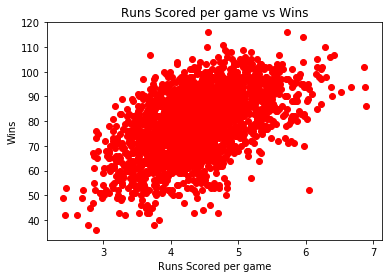

In [25]:
#Creating scatter plot of Runs scored per game vs Wins
plt.scatter(Teams_df['runs_spg'],Teams_df['W'],color='red')

#x label:
plt.xlabel('Runs Scored per game')

#y label:
plt.ylabel('Wins')

#add title:
plt.title('Runs Scored per game vs Wins')

#show the plot:
plt.show()

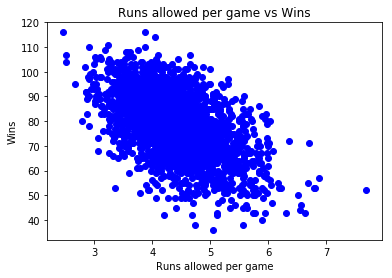

In [26]:
#Creating scatter plot of Runs allowed per game vs Wins
plt.scatter(Teams_df['runs_apg'],Teams_df['W'],color='blue')

#x label:
plt.xlabel('Runs allowed per game')

#y label:
plt.ylabel('Wins')

#add title:
plt.title('Runs allowed per game vs Wins')

#show the plot:
plt.show()

In [27]:
#Finding the correlation coefficient
Teams_df.corr()['W']

yearID          0.143987
G               0.178958
W               1.000000
R               0.551504
AB              0.233996
H               0.380281
2B              0.262323
3B              0.016970
HR              0.312713
BB              0.345348
SO              0.072069
SB              0.133300
RA             -0.518313
ER             -0.372580
ERA            -0.425833
CG             -0.041788
SHO             0.426892
SV              0.382174
IPouts          0.326087
HA             -0.384893
HRA             0.009880
BBA            -0.284782
SOA             0.259205
E              -0.304725
DP              0.015192
FP              0.319597
Wins_bins       0.925921
year_label      0.144831
era_1          -0.077104
era_2          -0.083089
era_3          -0.033073
era_4          -0.052278
era_5           0.042122
era_6           0.058439
era_7           0.066049
era_8           0.043453
mlb_rpg         0.006909
Decade_label    0.143568
decade_1910    -0.077104
decade_1920    -0.055176


In [28]:
#Creating a dataframe that leaves out the target variable
attributes = ['G','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG',
              'SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','era_1','era_2','era_3','era_4',
              'era_5','era_6','era_7','era_8','decade_1910','decade_1920','decade_1930','decade_1940',
              'decade_1950','decade_1960','decade_1970','decade_1980','decade_1990','decade_2000',
              'decade_2010','runs_spg','runs_apg','mlb_rpg']

data_attributes = Teams_df[attributes]

Teams_df.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,...,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,runs_spg,runs_apg
0,1961,LAA,162,70,744,5424,1331,218,22,189,...,0,0,1,0,0,0,0,0,4.592593,4.839506
1,1962,LAA,162,86,718,5499,1377,232,35,137,...,0,0,1,0,0,0,0,0,4.432099,4.358025
2,1963,LAA,161,70,597,5506,1378,208,38,95,...,0,0,1,0,0,0,0,0,3.708075,4.099379
3,1964,LAA,162,82,544,5362,1297,186,27,102,...,0,0,1,0,0,0,0,0,3.358025,3.401235
4,1965,CAL,162,75,527,5354,1279,200,36,92,...,0,0,1,0,0,0,0,0,3.253086,3.512346


In [29]:
#Using KMeans Clustering to find out the no. of clusters req
from sklearn.cluster import KMeans
from sklearn import metrics

#To find the ideal no. of clusters req we can use sklearn’s silhouette_score() function.

s_score_dict={}
for i in range(2,11):
    km=KMeans(n_clusters=i,random_state=1)
    l=km.fit_predict(data_attributes)
    s_s=metrics.silhouette_score(data_attributes, l)
    s_score_dict[i]=[s_s]
    
s_score_dict    

{2: [0.39069988022938779],
 3: [0.33807585484810926],
 4: [0.25340940061017991],
 5: [0.23561577404187492],
 6: [0.21388694120818216],
 7: [0.1957035058888586],
 8: [0.18660857478527418],
 9: [0.17354548788709254],
 10: [0.16986446409819547]}

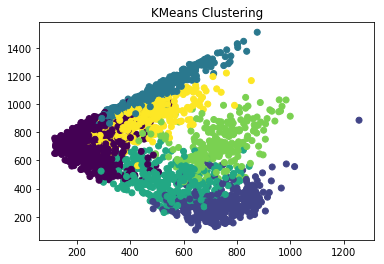

In [30]:
# Creating K-means model and determine euclidian distances for each data point

Kmeans_model = KMeans(n_clusters = 6, random_state = 1)

distances=Kmeans_model.fit_transform(data_attributes)

labels=Kmeans_model.labels_

plt.scatter(distances[:,0],distances[:,1],c=labels)

plt.title("KMeans Clustering")

plt.show()

In [31]:
Teams_df['labels'] = labels

attributes.append('labels')

Teams_df.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,...,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,runs_spg,runs_apg,labels
0,1961,LAA,162,70,744,5424,1331,218,22,189,...,0,1,0,0,0,0,0,4.592593,4.839506,5
1,1962,LAA,162,86,718,5499,1377,232,35,137,...,0,1,0,0,0,0,0,4.432099,4.358025,0
2,1963,LAA,161,70,597,5506,1378,208,38,95,...,0,1,0,0,0,0,0,3.708075,4.099379,0
3,1964,LAA,162,82,544,5362,1297,186,27,102,...,0,1,0,0,0,0,0,3.358025,3.401235,0
4,1965,CAL,162,75,527,5354,1279,200,36,92,...,0,1,0,0,0,0,0,3.253086,3.512346,0


In [32]:
# Create new DataFrame using only variables to be included in models
numeric_cols = ['G','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO',
                'SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','era_1','era_2','era_3',
                'era_4','era_5','era_6','era_7','era_8','decade_1910','decade_1920','decade_1930',
                'decade_1940','decade_1950','decade_1960','decade_1970','decade_1980','decade_1990',
                'decade_2000','decade_2010','runs_spg','runs_apg','mlb_rpg','labels','W']

data = Teams_df[numeric_cols]

data.head()

,G,R,AB,H,2B,3B,HR,BB,SO,SB,...,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,runs_spg,runs_apg,mlb_rpg,labels,W
0,162,744,5424,1331,218,22,189,681,1068.0,37,...,0,0,0,0,0,4.592593,4.839506,4.525175,5,70
1,162,718,5499,1377,232,35,137,602,917.0,46,...,0,0,0,0,0,4.432099,4.358025,4.460518,0,86
2,161,597,5506,1378,208,38,95,448,916.0,43,...,0,0,0,0,0,3.708075,4.099379,3.946881,0,70
3,162,544,5362,1297,186,27,102,472,920.0,49,...,0,0,0,0,0,3.358025,3.401235,4.035670,0,82
4,162,527,5354,1279,200,36,92,443,973.0,107,...,0,0,0,0,0,3.253086,3.512346,3.988293,0,75


In [33]:
from sklearn.model_selection import train_test_split

X=Teams_df[attributes]

y=Teams_df['W']

# Split data DataFrame into train and test sets:
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state = 42, test_size = 0.25)

In [34]:
# Import `LinearRegression` from `sklearn.linear_model`:
from sklearn.linear_model import LinearRegression

# Import `mean_absolute_error` from `sklearn.metrics`:
from sklearn.metrics import mean_absolute_error

#Create Linear Regression model:
lr = LinearRegression(normalize = True)

#fit model:
lr.fit(X_train, y_train)

#make predictions:
predictions = lr.predict(X_test)

#accuracy of modeL: average absolute value that your prediction missed its mark.
mae = mean_absolute_error(y_test, predictions)

mae

2.8066854056437389

In [35]:
# Import `RidgeCV` from `sklearn.linear_model`:
from sklearn.linear_model import RidgeCV

# Create Ridge Linear Regression model:
rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10), normalize = True)

#fit the model on train dataset:
rrm.fit(X_train, y_train)

#prediction on test dataset:
prediction_rrm = rrm.predict(X_test)

# Determine mean absolute error:
mae_rrm = mean_absolute_error(y_test, prediction_rrm)
 
mae_rrm

2.826377082976451